<a href="https://colab.research.google.com/github/YoshifumiMiyagi/SASA-Project/blob/main/%E2%98%85TCGA(sasa_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
SEED=42

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
raw = pd.read_csv('/content/drive/MyDrive/TCGA_all_group.csv',index_col=0)

In [32]:
raw

,A1BG.AS1,A2M,A2M.AS1,A2ML1,A4GALT,AAAS,AACS,AACSP1,AADACP1,AADAT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Group
TCGA-A5-A0G1-01A-11R-A118-07,1.000000,7.087463,0.000000,0.000000,6.247928,4.954196,2.321928,0.000000,0.000000,1.000000,...,6.000000,1.584963,2.807355,3.700440,0.000000,3.000000,7.807355,3.584963,3.807355,0
TCGA-A5-A0G2-01A-11R-A16W-07,0.000000,6.475733,1.000000,0.000000,5.392317,5.459432,2.807355,1.000000,0.000000,2.321928,...,6.781360,2.000000,3.584963,4.000000,2.000000,3.700440,8.479780,4.087463,4.321928,0
TCGA-A5-A0G3-01A-11R-A040-07,1.584963,5.459432,2.321928,0.000000,4.643856,6.087463,3.321928,0.000000,0.000000,1.584963,...,5.700440,1.584963,2.321928,5.087463,2.000000,3.321928,7.876517,3.459432,3.700440,0
TCGA-A5-A0R6-01A-11R-A104-07,1.000000,7.912889,1.000000,2.000000,5.930737,5.554589,3.459432,0.000000,0.000000,2.000000,...,5.857981,1.000000,2.000000,3.807355,1.000000,2.807355,8.179909,3.000000,3.700440,0
TCGA-A5-A1OF-01A-11R-A14D-07,1.000000,6.965784,0.000000,0.000000,6.741467,5.491853,3.807355,0.000000,1.000000,2.584963,...,5.954196,1.000000,2.000000,2.807355,2.584963,2.807355,7.179909,3.807355,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-61-2110-01A-01R-1568-13,1.000000,5.087463,1.000000,0.000000,2.321928,5.426265,3.321928,0.000000,1.000000,1.000000,...,5.000000,2.000000,3.169925,3.000000,1.000000,4.000000,8.888743,2.584963,4.169925,1
TCGA-61-2111-01A-01R-1568-13,1.000000,7.257388,2.807355,1.000000,5.000000,5.321928,3.169925,0.000000,1.000000,3.169925,...,5.754888,2.807355,4.000000,4.700440,2.000000,4.321928,7.599913,2.807355,5.087463,1
TCGA-61-2113-01A-01R-1568-13,1.584963,7.149747,1.000000,0.000000,4.643856,5.321928,3.000000,0.000000,2.584963,2.321928,...,5.209453,1.000000,2.321928,4.643856,2.584963,4.087463,8.252665,4.000000,4.459432,1
TCGA-OY-A56Q-01A-11R-A406-31,0.000000,7.942515,4.857981,2.807355,3.700440,5.643856,3.000000,2.000000,1.000000,2.807355,...,5.491853,2.000000,3.000000,5.000000,2.584963,4.523562,8.771489,2.584963,5.554589,1


In [33]:
X = raw.iloc[:,:-1]
y = raw.iloc[:,-1]

In [34]:
X_, X_val, y_, y_val = train_test_split(X, y, test_size = 0.2, random_state = SEED,stratify = y)
X_.shape, X_val.shape, y_.shape, y_val.shape

((444, 17161), (112, 17161), (444,), (112,))

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

model = Lasso(random_state=SEED)
skf = StratifiedKFold(5, shuffle=True, random_state = SEED)
pre =  make_pipeline(StandardScaler(),PowerTransformer())
mse_list = []
coefs = []

for train, test in skf.split(X_, y_):

    X_pre = pre.fit_transform(X_.iloc[train])
    X_te = pre.transform(X_.iloc[test])
    y_test = y_.iloc[test]
    alphas = 0.05
    model = Lasso(alpha=alphas)
    model.fit(X_pre, y_.iloc[train])
    y_pred = model.predict(X_te)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

In [36]:
Lasso_scores = pd.DataFrame(coefs).T
Lasso_scores.index = X_.columns
importance = np.abs(Lasso_scores)
df_choise = importance[(importance > 0)].dropna()
df_choise

,0,1,2,3,4
APOBEC3G,0.009042,0.014607,0.010974,0.017418,0.011860
PDXP,0.021121,0.038539,0.034356,0.014100,0.016245
RPS3A,0.036106,0.012091,0.034369,0.031060,0.004797
SDHC,0.024443,0.076740,0.015171,0.012850,0.022191
SNAP23,0.009926,0.010596,0.010244,0.017354,0.012364
TXNDC5,0.041740,0.047961,0.025656,0.075074,0.065312


In [37]:
FEATURE_6 =df_choise.index

In [38]:
xgbc = XGBClassifier(random_state=SEED,scale_pos_weight=333/112,eval_metric='auc',n_estimators=25, max_depth=3)

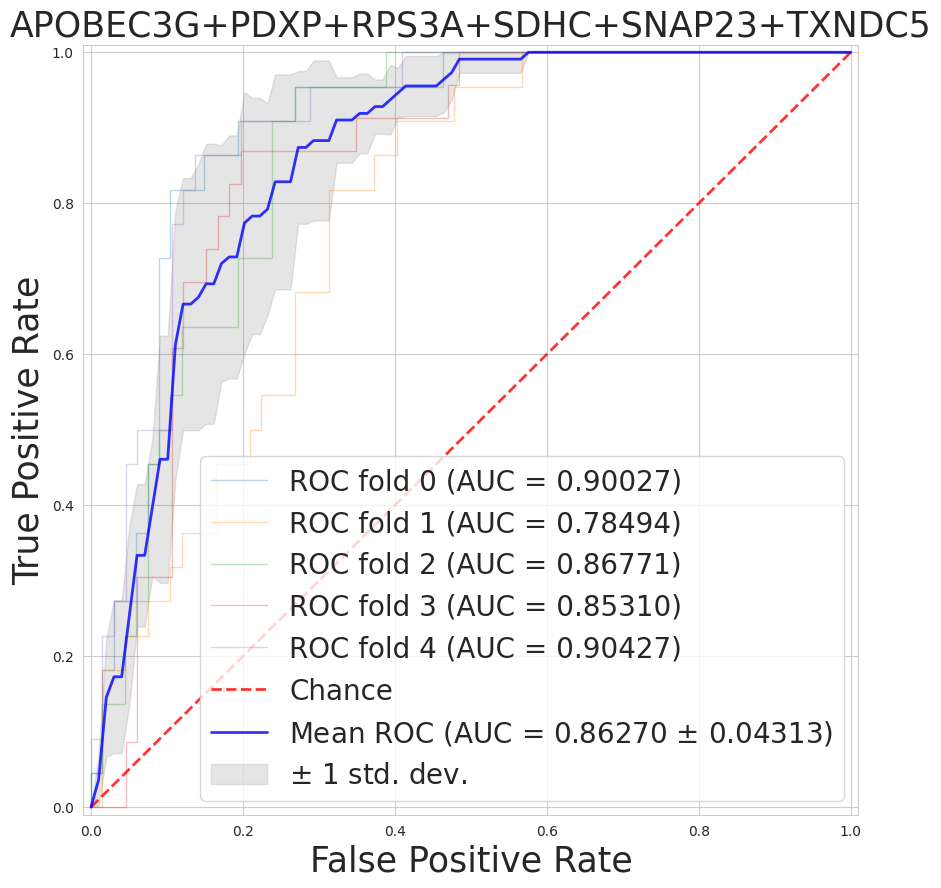

In [39]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier = xgbc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_.loc[:,FEATURE_6], y_):
    probas_ = classifier.fit(X_.loc[:,FEATURE_6].iloc[train], y_.iloc[train]).predict_proba(X_.loc[:,FEATURE_6].iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('APOBEC3G+PDXP+RPS3A+SDHC+SNAP23+TXNDC5',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('ROC_XGBC_6feat.png',format="png", dpi=900)

plt.show()

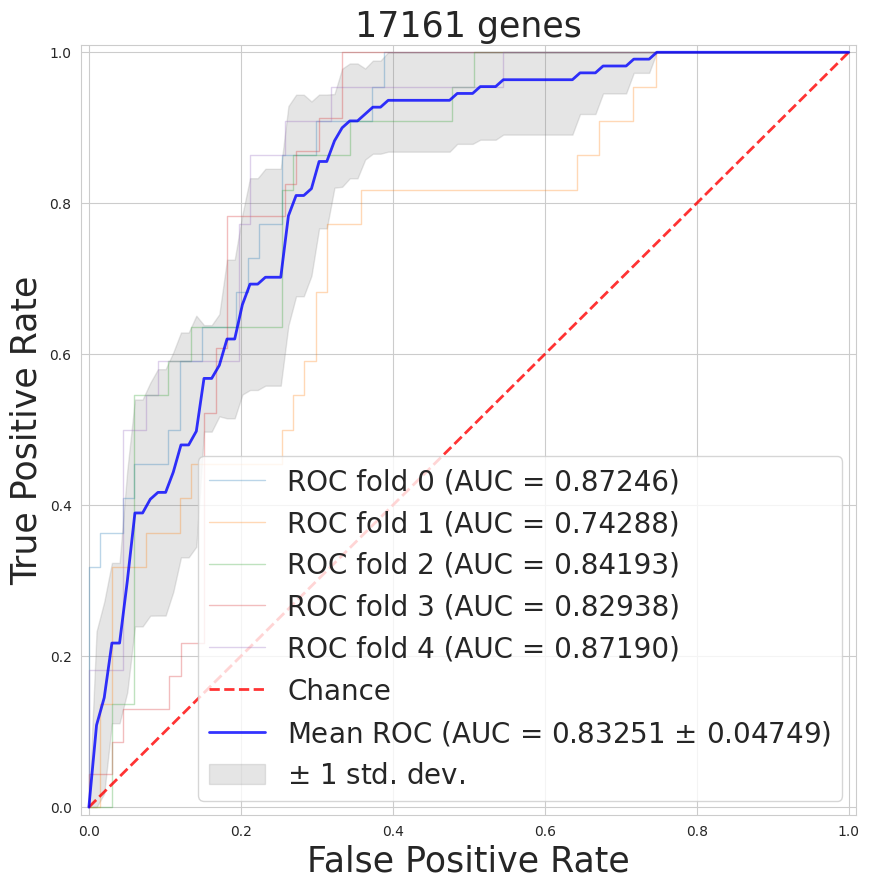

In [40]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier = xgbc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_, y_):
    probas_ = classifier.fit(X_.iloc[train], y_.iloc[train]).predict_proba(X_.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('17161 genes',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('ROC_XGBC_5feat.png',format="png", dpi=900)

plt.show()

In [41]:
xgbc.fit(X_.loc[:,FEATURE_6], y_)

y_pred_F = xgbc.predict(X_val.loc[:,FEATURE_6])
y_true_F = y_val

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
cm_F = confusion_matrix(y_true_F, y_pred_F)

df_report_F= pd.DataFrame(classification_report(y_true_F, y_pred_F, output_dict=True)).T
df_report_F.set_axis(["Ovarian cancer","uterine cancer", "accuracy", "macro avg","weighted avg"], axis="index")

,precision,recall,f1-score,support
Ovarian cancer,0.880000,0.785714,0.830189,84.000000
uterine cancer,0.513514,0.678571,0.584615,28.000000
accuracy,0.758929,0.758929,0.758929,0.758929
macro avg,0.696757,0.732143,0.707402,112.000000
weighted avg,0.788378,0.758929,0.768795,112.000000


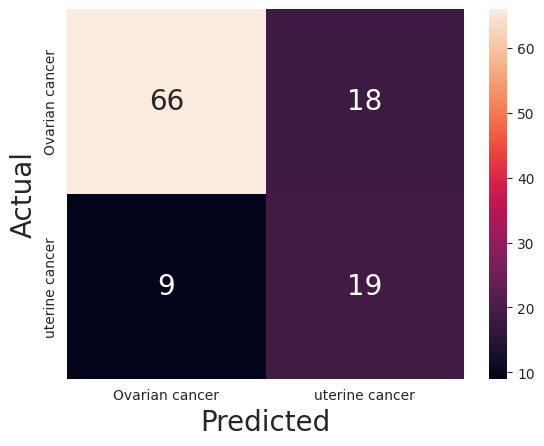

In [42]:
CM = pd.DataFrame(cm_F)
CM.columns = ["Ovarian cancer","uterine cancer"]
CM.index = ["Ovarian cancer","uterine cancer"]

p=sns.heatmap(CM, annot=True,annot_kws={"fontsize":20})
p.set_xlabel("Predicted", fontsize = 20)
p.set_ylabel("Actual", fontsize = 20)
plt.savefig('cm_5.png', dpi = 600)

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score

SEN = []
SPC = []
AUPRC = []
PRE =[]
F1 = []
ACC = []
NPV = []

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
i = 0
print('confusion matrix = \n', confusion_matrix(y_true_F, y_pred_F))
print(f'Accuracy : {accuracy_score(y_true_F, y_pred_F)}')
print(f'Precision : {precision_score(y_true_F, y_pred_F)}')
print(f'Recall : {recall_score(y_true_F, y_pred_F)}')
print(f'F1 score : {f1_score(y_true_F, y_pred_F)}')
print(f'AUC: {roc_auc_score(y_true_F, y_pred_F)}')
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fp)
def negative_predictive_value(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return tn / (tn + fn)
print(f'specificity :{specificity_score(y_true_F, y_pred_F)}')
print(f'NPV :{negative_predictive_value(y_true_F, y_pred_F)}')

confusion matrix = 
 [[66 18]
 [ 9 19]]
Accuracy : 0.7589285714285714
Precision : 0.5135135135135135
Recall : 0.6785714285714286
F1 score : 0.5846153846153848
AUC: 0.7321428571428572
specificity :0.7857142857142857
NPV :0.88


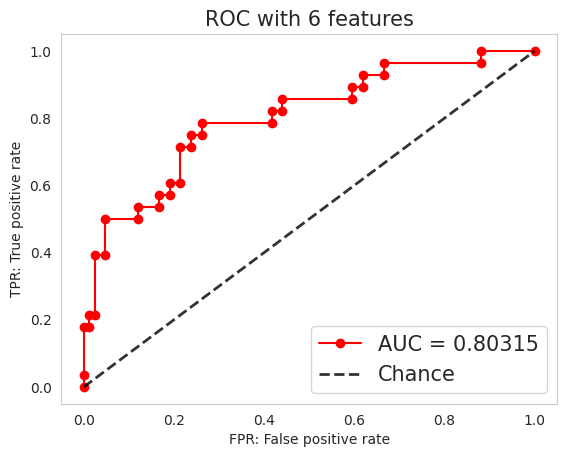

In [44]:
xgbc.fit(X_.loc[:,FEATURE_6], y_)

y_pred_prob = xgbc.predict_proba(X_val.loc[:,FEATURE_6])[:, 1]
y_true_F = y_val

fpr, tpr, thresholds = roc_curve(y_true_F, y_pred_prob)
b = roc_auc_score(y_true_F, y_pred_prob)
plt.plot(fpr, tpr, marker='o',label='AUC = %.5f'%b,color='r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Chance', alpha=.8)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(loc="lower right",fontsize="15")
plt.title('ROC with 6 features',fontsize="15")
plt.grid()
plt.savefig('final_ROC.png',format="png", dpi=600)
plt.show()

APOBEC3G,PDXP,RPS3A,SDHC,SNAP23,TXNDC5

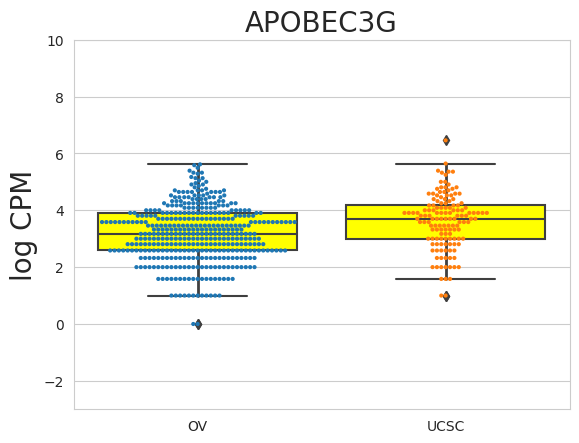

In [45]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="APOBEC3G", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="APOBEC3G", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("APOBEC3G", fontsize = 20)
ax.set_ylim([-3, 10])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('APOBEC3G.png')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


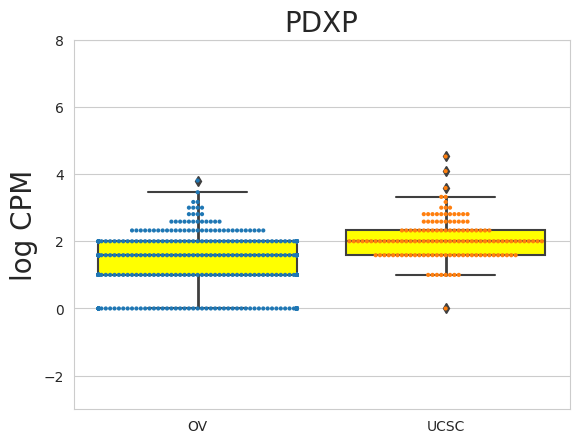

In [46]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="PDXP", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="PDXP", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("PDXP", fontsize = 20)
ax.set_ylim([-3, 8])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('PDXP.png')

plt.show()

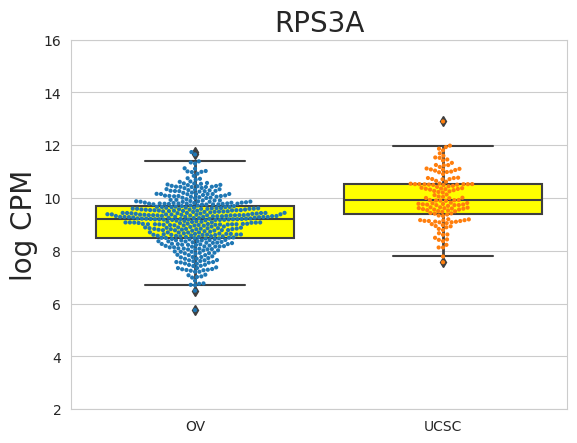

In [47]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="RPS3A", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="RPS3A", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("RPS3A", fontsize = 20)
ax.set_ylim([2, 16])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('RPS3A.png')

plt.show()

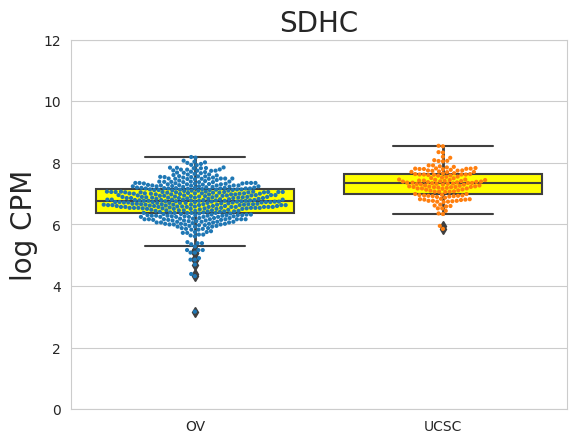

In [48]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="SDHC", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="SDHC", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("SDHC", fontsize = 20)
ax.set_ylim([0, 12])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('SDHC.png')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


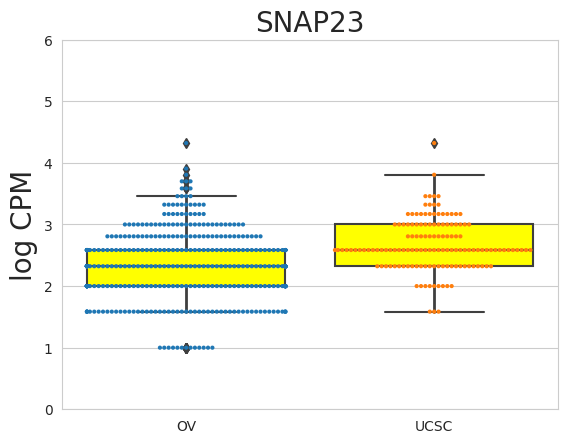

In [49]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="SNAP23", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="SNAP23", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("SNAP23", fontsize = 20)
ax.set_ylim([0, 6])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('SNAP23.png')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


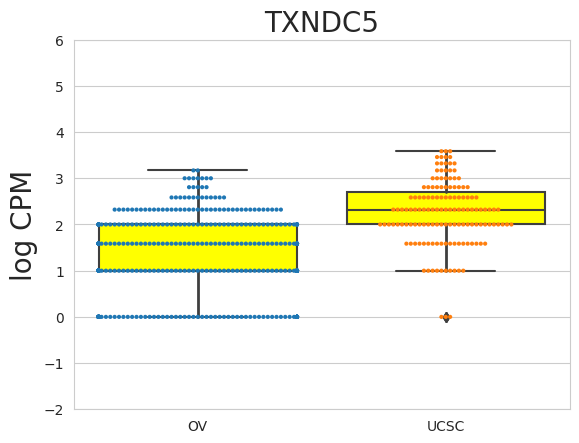

In [50]:
sns.set_style("whitegrid")

ax = sns.swarmplot(x="Group", hue="Group",y="TXNDC5", data=raw,legend = False,size=3)
ax = sns.boxplot(x="Group", y="TXNDC5", data=raw,
        showcaps=True,boxprops={'facecolor':'yellow'},
        showfliers=True,whiskerprops={'linewidth':2},)
ax.set_xlabel("", fontsize = 20)
ax.set_ylabel("log CPM", fontsize = 20)
ax.set_title("TXNDC5", fontsize = 20)
ax.set_ylim([-2, 6])
ax.set_xticklabels(['OV','UCSC'])
plt.savefig('TXNDC5.png')

plt.show()

In [51]:
!python -V

Python 3.10.12
